### Lasso Regression

Lasso Regression is a type of linear regression that includes a regularization term to prevent overfitting. It is also known as Least Absolute Shrinkage and Selection Operator.

#### Concept

In ordinary linear regression, we aim to minimize the sum of squared errors (SSE) between the predicted and actual values. The objective function for ordinary linear regression is:

$$
J(\beta) = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

Where:
$$
\begin{array}{ll}
y_i & \text{is the actual value.} \\
\hat{y}_i & \text{is the predicted value, which can be expressed as:} \\
\hat{y}_i &= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} \\
N & \text{is the number of observations.} \\
\beta & \text{are the model coefficients.}
\end{array}
$$

Lasso Regression modifies the cost function by adding a penalty term proportional to the sum of the absolute values of the coefficients. The modified cost function is:

$$
J(\beta) = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

Where:
$$
\begin{array}{ll}
\lambda & \text{is the regularization parameter.} \\
\beta_j & \text{are the model coefficients.} \\
p & \text{is the number of predictors (features).}
\end{array}
$$

#### Purpose of Regularization

The purpose of adding the regularization term is to reduce the flexibility of coefficients, which helps to reduce model complexity and prevent overfitting. The regularization parameter $ \lambda $ controls the strength of the penalty:
- When $ \lambda $ = 0, Lasso Regression becomes ordinary linear regression.
- When $ \lambda $ is very large, the coefficients are heavily penalized and some may become exactly zero, effectively performing feature selection.

#### Key Takeaways
- Lasso Regression adds a penalty term to the linear regression cost function to shrink the coefficients and prevent overfitting.
- The strength of the penalty is controlled by the regularization parameter $ \lambda $ .
- Unlike Ridge Regression, Lasso Regression can shrink some coefficients to exactly zero, effectively performing feature selection.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Best alpha for Lasso: 0.002682695795279727
Lasso Regression - Mean Squared Error: 0.5285, R-squared: 0.5973


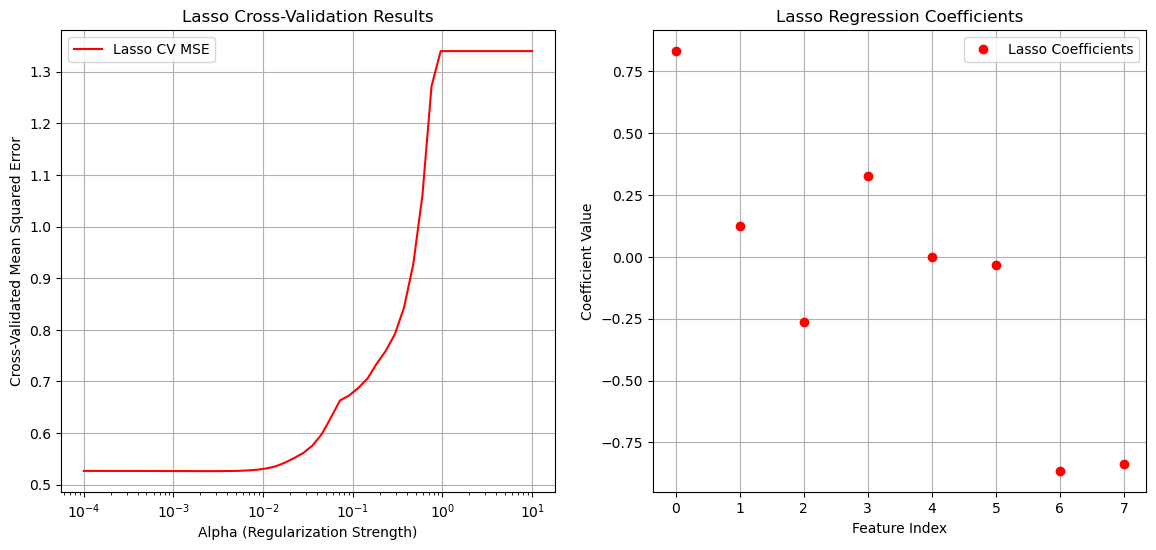

In [6]:
# Load the California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define a range of alpha (lambda) values
alphas = np.logspace(-4, 1, 50)

# Use cross-validation to evaluate Lasso regression with different alphas
lasso_cv_scores = []
non_zero_counts = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_cv_score = np.mean(cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    lasso_cv_scores.append(-lasso_cv_score)
    # lasso_model.fit(X_train, y_train)
    # non_zero_counts.append(np.sum(lasso_model.coef_ != 0))

# Find the best alpha value
best_alpha_lasso = alphas[np.argmin(lasso_cv_scores)]
print(f'Best alpha for Lasso: {best_alpha_lasso}')

# Train the final Lasso model with the best alpha value
lasso_model = Lasso(alpha=best_alpha_lasso, max_iter=100000)
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression - Mean Squared Error: {mse_lasso:.4f}, R-squared: {r2_lasso:.4f}')

# Plot the cross-validation results and number of non-zero coefficients
plt.figure(figsize=(14, 6))

# Cross-validation MSE plot
plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_cv_scores, label='Lasso CV MSE', color='red')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Cross-Validated Mean Squared Error')
plt.title('Lasso Cross-Validation Results')
plt.legend()
plt.grid(True)

# Plot the final coefficients
plt.subplot(1, 2, 2)
plt.plot(lasso_model.coef_, marker='o', linestyle='none', label='Lasso Coefficients', color='red')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
lasso_model.coef_

array([ 0.83407943,  0.12307703, -0.26877061,  0.33363476, -0.        ,
       -0.03330636, -0.86954771, -0.84269157])